Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import kruskal
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [236]:
'''блок предобработки'''
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                     'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

stud_math.fedu = stud_math.fedu.apply(lambda x: None if x == 40.0 else x)

stud_math.famrel = stud_math.famrel.apply(lambda x: None if x == -1.0 else x)

stud_math.drop(['granular'], inplace=True, axis=1)

stud_math.dropna(subset=['score'], inplace=True, axis=0)

stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   pstatus     344 non-null    object 
 6   medu        386 non-null    float64
 7   fedu        364 non-null    float64
 8   mjob        370 non-null    object 
 9   fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

'''Поскольку суть проекта заключается в выяснении причин попадания в группу риска, а именно получения оценки, значение которой лежит ниже Q1, возьмем из данных соответствующую группу значений  и постараемся выявить факторы, обладающие влиянием на получение низкой оценки'''


In [237]:
q25 = stud_math.score.quantile(0.25)
df_q25 = stud_math[(stud_math['score'] <= q25)]
df_q25

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


In [243]:
'''оценим степень корреляции между значениями из разных  колонок и колонки score'''
df_q25.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.111022,-0.226478,0.022402,-0.177759,0.175613,0.095222,0.181904,0.153178,-0.174062,0.078082,-0.016497
medu,-0.111022,1.000000,0.677408,-0.135734,0.119445,-0.194096,-0.045797,0.050150,0.078678,-0.132385,0.229560,0.127780
fedu,-0.226478,0.677408,1.000000,-0.017608,0.202923,-0.272593,-0.097483,0.006463,0.018804,0.005724,0.157271,0.021836
traveltime,0.022402,-0.135734,-0.017608,1.000000,-0.194847,-0.018581,-0.004805,-0.033194,0.102303,0.069451,-0.062946,-0.015878
studytime,-0.177759,0.119445,0.202923,-0.194847,1.000000,-0.307667,-0.022719,-0.193062,-0.150653,-0.036638,-0.129230,-0.017233
failures,0.175613,-0.194096,-0.272593,-0.018581,-0.307667,1.000000,-0.023765,0.083003,0.123662,0.138520,-0.016846,-0.099770
famrel,0.095222,-0.045797,-0.097483,-0.004805,-0.022719,-0.023765,1.000000,0.078495,0.195176,-0.057704,0.089976,0.093402
freetime,0.181904,0.050150,0.006463,-0.033194,-0.193062,0.083003,0.078495,1.000000,0.263124,-0.004065,0.030016,0.061755
goout,0.153178,0.078678,0.018804,0.102303,-0.150653,0.123662,0.195176,0.263124,1.000000,-0.161679,0.132417,0.159267
health,-0.174062,-0.132385,0.005724,0.069451,-0.036638,0.138520,-0.057704,-0.004065,-0.161679,1.000000,-0.103882,0.011241


In [10]:
# Судя по результатам корреляционного анализа, только 3 параметра могут оказывать влияние на параметр score:
#уровень образования матери 'medu', свободное время с друзьями 'goout' и количество пропусков занятий 'absences'.
# Удивительно, что все корреляции положительны, даже количество пропусков!!

In [238]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=column, y='score',
                data=df_q25,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

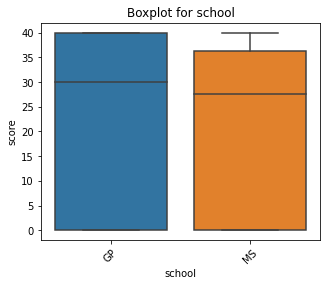

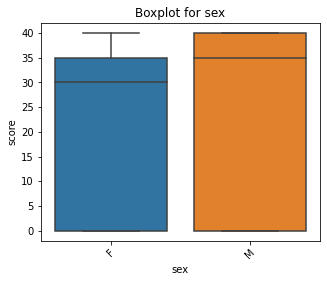

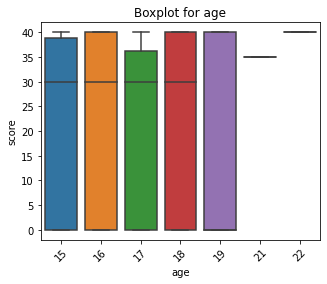

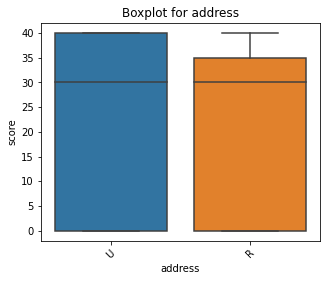

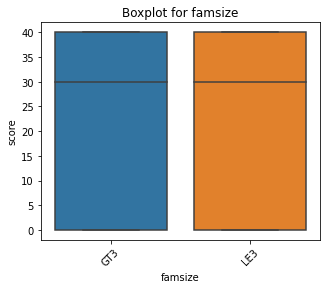

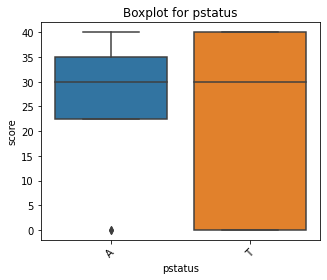

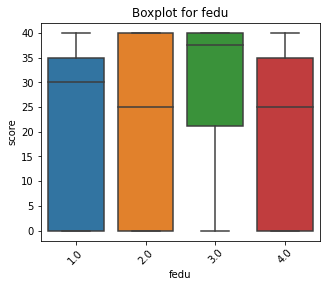

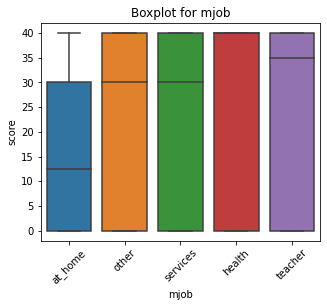

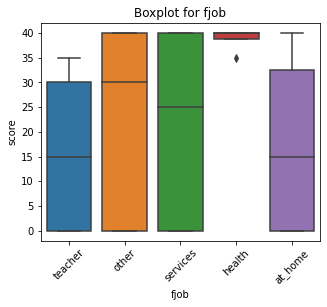

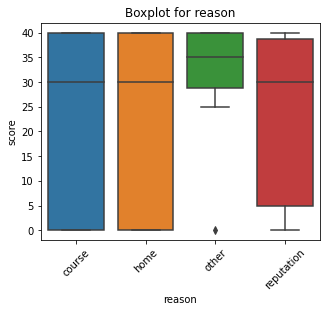

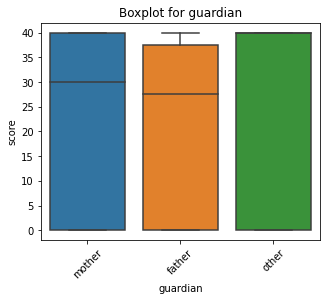

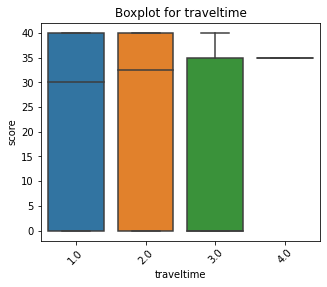

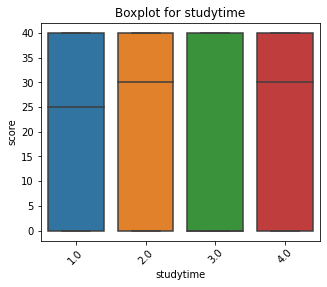

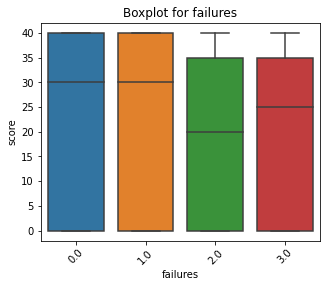

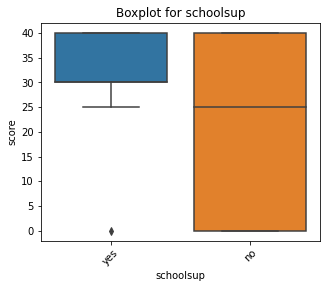

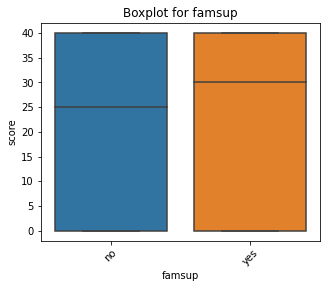

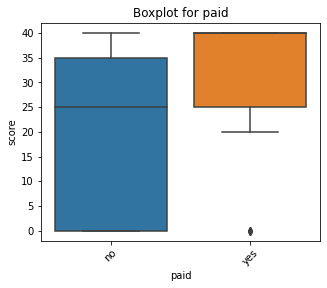

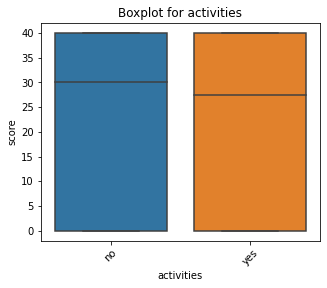

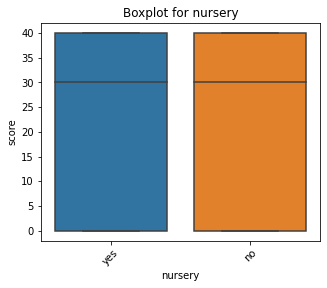

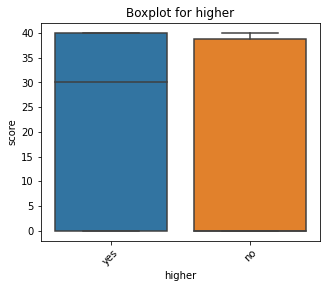

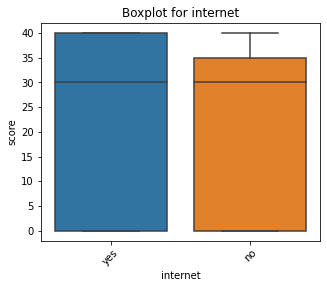

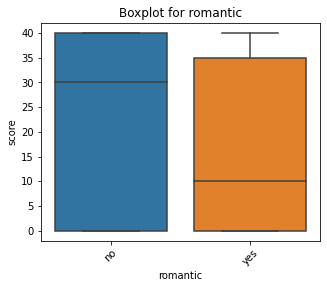

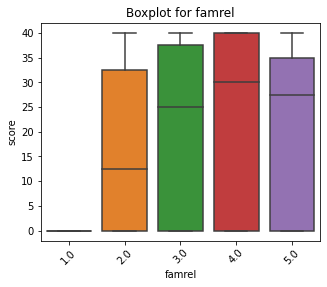

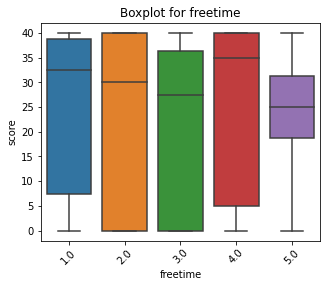

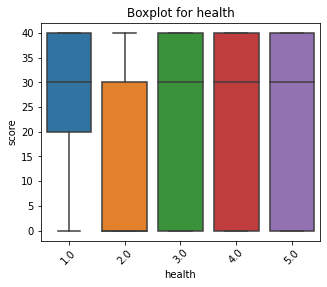

In [244]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher','internet', 'romantic', 'famrel', 'freetime', 'health']:
    get_boxplot(col)

In [9]:
# Поделим признаки на бинарные и небинарные. Бинарные проверим двумя статистическими критериями на значимость влияния позже
#(методом ТТEST и методом Краскела-Уоллиса).
# Небинарные признаки оценим по графикам:
# 1) fedu - 2.0 и 4.0 уровни образования дают больше всего плохих оценко среди прочих
# 2) mjob - работа матери at_home дает больше всего плохих оценок по сравнению с другими типами занятости
# 3) fjob - работа отца, at_home&teacher также судя по выборке возможно оказывают негативное влияние на успеваемость
# 4) reason - четко выявить влияющую причину нельзя, поскольку самой высокой медианой на графике является медиана выборки
#по причине other
# 5) guardian - отец в качестве опекуна ребенка, в среднем хуже сказывается на успеваемости в выборке
# 6) traveltime - нельзя сделать однозначный вывод по значениям медиан, поскольку значений 4 явно недостаточно для этого
# 7) studytime - нельзя сделать однозначный вывод по значениям медиан, поскольку не во на всех графиках отмечена медиана
# 8) failures - значение 2 по данному признаку имеет заниженную медиану относительно остальных, возможно это является
#фактором неуспеваемости
# 9) famrel - значения по данному признаку 1 и 2 возможно влияют негативно на оценку экзамена по математике
# 10) freetime&health - видимо, параметры не оказывают значительного влияния на потенциальную оценку по экзамену

In [245]:
'''сравнение средних методом ТТEST и медиан по методу Краскела-Уоллиса для выборки оценок в колонке score,
    сгруппированной по интересующим парным признакам для значений ниже Q1'''

list_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup',
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
data_list_1 = []
for x in list_columns:
    gb = df_q25.groupby(x)
    data_list_1.append([gb.get_group(x) for x in gb.groups])

print('статистические параметры оценки выборки значений score для всех возможных значений school:',
      '\n', (kruskal((data_list_1[0][0]['score']), (data_list_1[0][1]['score']))),
      '\n', (ttest_ind((data_list_1[0][0]['score']), (data_list_1[0][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений school: 
 KruskalResult(statistic=0.007867923786013172, pvalue=0.9293192851835206) 
 Ttest_indResult(statistic=-0.10466625425237426, pvalue=0.9168545584779377)


In [181]:
print('статистические параметры оценки выборки значений score для всех возможных значений sex:',
      '\n', (kruskal((data_list_1[1][0]['score']), (data_list_1[1][1]['score']))),
      '\n', (ttest_ind((data_list_1[1][0]['score']), (data_list_1[1][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений sex: 
 KruskalResult(statistic=1.3138987323093119, pvalue=0.2516899800513261) 
 Ttest_indResult(statistic=-0.7925523080904245, pvalue=0.42995315780644383)


In [182]:
print('статистические параметры оценки выборки значений score для всех возможных значений address:',
      '\n', (kruskal((data_list_1[2][0]['score']), (data_list_1[2][1]['score']))),
      '\n', (ttest_ind((data_list_1[2][0]['score']), (data_list_1[2][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений address: 
 KruskalResult(statistic=0.20765442434896142, pvalue=0.6486120867599313) 
 Ttest_indResult(statistic=-0.026848593915126596, pvalue=0.9786362279470391)


In [183]:
print('статистические параметры оценки выборки значений score для всех возможных значений famsize:',
      '\n', (kruskal((data_list_1[3][0]['score']), (data_list_1[3][1]['score']))),
      '\n', (ttest_ind((data_list_1[3][0]['score']), (data_list_1[3][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений famsize: 
 KruskalResult(statistic=0.5963757699317315, pvalue=0.43996418468793264) 
 Ttest_indResult(statistic=-0.8048029107723552, pvalue=0.42305438809134366)


In [184]:
print('статистические параметры оценки выборки значений score для всех возможных значений pstatus:',
      '\n', (kruskal((data_list_1[4][0]['score']), (data_list_1[4][1]['score']))),
      '\n', (ttest_ind((data_list_1[4][0]['score']), (data_list_1[4][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений pstatus: 
 KruskalResult(statistic=0.03306556102613973, pvalue=0.8557087769596551) 
 Ttest_indResult(statistic=0.5553508822579112, pvalue=0.580096438440468)


In [185]:
print('статистические параметры оценки выборки значений score для всех возможных значений schoolsup:',
      '\n', (kruskal((data_list_1[5][0]['score']), (data_list_1[5][1]['score']))),
      '\n', (ttest_ind((data_list_1[5][0]['score']), (data_list_1[5][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений schoolsup: 
 KruskalResult(statistic=3.769882741333367, pvalue=0.05218329093176912) 
 Ttest_indResult(statistic=-2.6389933973613293, pvalue=0.009718536817148765)


In [186]:
print('статистические параметры оценки выборки значений score для всех возможных значений famsup:',
      '\n', (kruskal((data_list_1[6][0]['score']), (data_list_1[6][1]['score']))),
      '\n', (ttest_ind((data_list_1[6][0]['score']), (data_list_1[6][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений famsup: 
 KruskalResult(statistic=0.6273811287547417, pvalue=0.4283175633790085) 
 Ttest_indResult(statistic=-1.0283905115281684, pvalue=0.3064051558151265)


In [214]:
print('статистические параметры оценки выборки значений score для всех возможных значений paid:',
      '\n', (kruskal((data_list_1[7][0]['score']), (data_list_1[7][1]['score']))),
      '\n', (ttest_ind((data_list_1[7][0]['score']), (data_list_1[7][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений paid: 
 KruskalResult(statistic=10.086666666666659, pvalue=0.001493460200651813) 
 Ttest_indResult(statistic=-2.998751300674312, pvalue=0.003534210485562152)


In [215]:
print('статистические параметры оценки выборки значений score для всех возможных значений activities:',
      '\n', (kruskal((data_list_1[8][0]['score']), (data_list_1[8][1]['score']))),
      '\n', (ttest_ind((data_list_1[8][0]['score']), (data_list_1[8][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений activities: 
 KruskalResult(statistic=0.9824768876021074, pvalue=0.321588066622583) 
 Ttest_indResult(statistic=1.2194559439059767, pvalue=0.2256902008939895)


In [216]:
print('статистические параметры оценки выборки значений score для всех возможных значений nursery:',
      '\n', (kruskal((data_list_1[9][0]['score']), (data_list_1[9][1]['score']))),
      '\n', (ttest_ind((data_list_1[9][0]['score']), (data_list_1[9][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений nursery: 
 KruskalResult(statistic=0.18857120392676602, pvalue=0.6641084619083264) 
 Ttest_indResult(statistic=-0.6016471170180445, pvalue=0.5488573836526581)


In [217]:
print('статистические параметры оценки выборки значений score для всех возможных значений higher:',
      '\n', (kruskal((data_list_1[10][0]['score']), (data_list_1[10][1]['score']))),
      '\n', (ttest_ind((data_list_1[10][0]['score']), (data_list_1[10][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений higher: 
 KruskalResult(statistic=0.7114553166093326, pvalue=0.39896110501745563) 
 Ttest_indResult(statistic=-1.2231405311763315, pvalue=0.22430207304300795)


In [220]:
print('статистические параметры оценки выборки значений score для всех возможных значений internet:',
      '\n', (kruskal((data_list_1[11][0]['score']), (data_list_1[11][1]['score']))),
      '\n', (ttest_ind((data_list_1[11][0]['score']), (data_list_1[11][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений internet: 
 KruskalResult(statistic=0.8009810866331304, pvalue=0.3708002025486764) 
 Ttest_indResult(statistic=-0.6885151583675133, pvalue=0.492939576705676)


In [219]:
print('статистические параметры оценки выборки значений score для всех возможных значений romantic:',
      '\n', (kruskal((data_list_1[12][0]['score']), (data_list_1[12][1]['score']))),
      '\n', (ttest_ind((data_list_1[12][0]['score']), (data_list_1[12][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений romantic: 
 KruskalResult(statistic=2.6130880088885875, pvalue=0.10598520038165651) 
 Ttest_indResult(statistic=1.8910487057062346, pvalue=0.06183456274023282)


In [5]:
# Для оценки ниже Q1 наиболее сильное влияние оказывают параметры дополнительного образования schoolsup и paid,
# что довольно ожидаемо. Также, недостоверное для p=0.05, но близкое к достоверности значение оказывает параметр romantic. 

In [7]:
# Для более полной и "симметричной"
# оценки параметров также был проведён аналогичный анализ для группы значений score  в области >Q3

q75 = stud_math.score.quantile(0.75)
df_q75 = stud_math[(stud_math['score'] >= q75)]
df_q75

In [204]:
list_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'schoolsup',
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
data_list_2 = []
for x in list_columns:
    gb = df_q75.groupby(x)
    data_list_2.append([gb.get_group(x) for x in gb.groups])


# сравнение средних методом ТТEST и медиан по методу Краскела-Уоллиса для выборки оценок в колонке score, сгруппированной по интересующим парным признакам для значений выше Q3
print('статистические параметры оценки выборки значений score для всех возможных значений school:',
      '\n', (kruskal((data_list_2[0][0]['score']), (data_list_2[0][1]['score']))),
      '\n', (ttest_ind((data_list_2[0][0]['score']), (data_list_2[0][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений school: 
 KruskalResult(statistic=0.13659200839276872, pvalue=0.7116928017652484) 
 Ttest_indResult(statistic=-0.1647836532940907, pvalue=0.8694536892604813)


In [205]:
print('статистические параметры оценки выборки значений score для всех возможных значений sex:',
      '\n', (kruskal((data_list_2[1][0]['score']), (data_list_2[1][1]['score']))),
      '\n', (ttest_ind((data_list_2[1][0]['score']), (data_list_2[1][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений sex: 
 KruskalResult(statistic=0.9567623442913489, pvalue=0.32800395306251395) 
 Ttest_indResult(statistic=-0.9656033962798037, pvalue=0.3366194983955485)


In [206]:
print('статистические параметры оценки выборки значений score для всех возможных значений address:',
      '\n', (kruskal((data_list_2[2][0]['score']), (data_list_2[2][1]['score']))),
      '\n', (ttest_ind((data_list_2[2][0]['score']), (data_list_2[2][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений address: 
 KruskalResult(statistic=0.7832102776542288, pvalue=0.3761611174959295) 
 Ttest_indResult(statistic=0.8477719220032895, pvalue=0.3987185025732597)


In [207]:
print('статистические параметры оценки выборки значений score для всех возможных значений famsize:',
      '\n', (kruskal((data_list_2[3][0]['score']), (data_list_2[3][1]['score']))),
      '\n', (ttest_ind((data_list_2[3][0]['score']), (data_list_2[3][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений famsize: 
 KruskalResult(statistic=2.056530829093152, pvalue=0.15155486825305006) 
 Ttest_indResult(statistic=-1.2367923292776561, pvalue=0.21931208359946555)


In [208]:
print('статистические параметры оценки выборки значений score для всех возможных значений pstatus:',
      '\n', (kruskal((data_list_2[4][0]['score']), (data_list_2[4][1]['score']))),
      '\n', (ttest_ind((data_list_2[4][0]['score']), (data_list_2[4][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений pstatus: 
 KruskalResult(statistic=2.7144807919780534, pvalue=0.09944132177297911) 
 Ttest_indResult(statistic=1.9700600909940307, pvalue=0.05208730409267626)


In [209]:
print('статистические параметры оценки выборки значений score для всех возможных значений schoolsup:',
      '\n', (kruskal((data_list_2[5][0]['score']), (data_list_2[5][1]['score']))),
      '\n', (ttest_ind((data_list_2[5][0]['score']), (data_list_2[5][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений schoolsup: 
 KruskalResult(statistic=0.10179572106736569, pvalue=0.7496852484784737) 
 Ttest_indResult(statistic=0.34567459587224264, pvalue=0.7303436249319379)


In [210]:
print('статистические параметры оценки выборки значений score для всех возможных значений famsup:',
      '\n', (kruskal((data_list_2[6][0]['score']), (data_list_2[6][1]['score']))),
      '\n', (ttest_ind((data_list_2[6][0]['score']), (data_list_2[6][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений famsup: 
 KruskalResult(statistic=0.04195033945783943, pvalue=0.8377144636796725) 
 Ttest_indResult(statistic=0.3643263078595948, pvalue=0.7164983599731958)


In [211]:
print('статистические параметры оценки выборки значений score для всех возможных значений paid:',
      '\n', (kruskal((data_list_2[7][0]['score']), (data_list_2[7][1]['score']))),
      '\n', (ttest_ind((data_list_2[7][0]['score']), (data_list_2[7][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений paid: 
 KruskalResult(statistic=1.5842041442911297, pvalue=0.20815615827734293) 
 Ttest_indResult(statistic=1.2215451356907916, pvalue=0.2250348280821016)


In [212]:
print('статистические параметры оценки выборки значений score для всех возможных значений activities:',
      '\n', (kruskal((data_list_2[8][0]['score']), (data_list_2[8][1]['score']))),
      '\n', (ttest_ind((data_list_2[8][0]['score']), (data_list_2[8][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений activities: 
 KruskalResult(statistic=0.5243378452862771, pvalue=0.46899712354438894) 
 Ttest_indResult(statistic=0.5091904008827117, pvalue=0.611787184320962)


In [222]:
print('статистические параметры оценки выборки значений score для всех возможных значений nursery:',
      '\n', (kruskal((data_list_2[9][0]['score']), (data_list_2[9][1]['score']))),
      '\n', (ttest_ind((data_list_2[9][0]['score']), (data_list_2[9][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений nursery: 
 KruskalResult(statistic=2.545045442656211, pvalue=0.1106407276182054) 
 Ttest_indResult(statistic=-1.8280558540300076, pvalue=0.07074728712420261)


In [4]:
# статистические параметры оценки выборки значений score для всех возможных значений higher в диапазоне>Q3
#посчитать нельзя, т.к тут только один вид значений higher=yes

In [231]:
print('статистические параметры оценки выборки значений score для всех возможных значений internet:',
      '\n', (kruskal((data_list_2[11][0]['score']), (data_list_2[11][1]['score']))),
      '\n', (ttest_ind((data_list_2[11][0]['score']), (data_list_2[11][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений internet: 
 KruskalResult(statistic=0.6048904835576202, pvalue=0.4367181452460478) 
 Ttest_indResult(statistic=-0.4322853088358344, pvalue=0.6665915237331588)


In [232]:
print('статистические параметры оценки выборки значений score для всех возможных значений romantic:',
      '\n', (kruskal((data_list_2[12][0]['score']), (data_list_2[12][1]['score']))),
      '\n', (ttest_ind((data_list_2[12][0]['score']), (data_list_2[12][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений romantic: 
 KruskalResult(statistic=1.9286428239107938, pvalue=0.16490700328116137) 
 Ttest_indResult(statistic=1.8398872556055252, pvalue=0.06900931890990236)


In [2]:
# В области значений score>Q3 наиболее значимыми оказались следующие характеристики:
# pstatus - на грани достоверности в 5%, стоит принять во внимание;
# nursery - также недостоверно, но можно принять во внимание при p=0.1
# higher - для данной области значений принимает единственное значение 'yes'
# romantic - как и в случае <1Q недостоверно, но может оказать влияние

In [3]:
# Поскольку в предыдущем пункте характеристика pstatus вошла в список характеристик,
# которые могут оказывать влияние на успеваемость ученика, стоит проверить гипотезу:
# разделить всю предотсавленную выборку на famsize == 'LE3' и сгруппировать этот срез по признаку pstatus.
# Таким образом выделить полные семьи (мама+папа+ребенок) и неполные (мама или папа и ребенок)
# посмотреть рапределение оценок в этих группах.

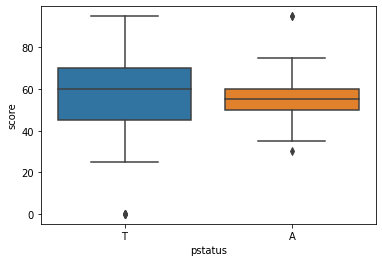

In [247]:
df_famsize3 = stud_math[(stud_math['famsize'] == 'LE3')]
ax_filtered = sns.boxplot(x=df_famsize3['pstatus'], y=df_famsize3['score'])
# Семья из одного родителя и ребенка вляет зачастую негативно на получение высокой оценки по экзамену

In [250]:
data_list_3 = []
gb = df_famsize3.groupby('pstatus')
data_list_3.append([gb.get_group(x) for x in gb.groups])
data_list_3

print('статистические параметры оценки выборки значений score для всех возможных значений pstatus:',
      '\n', (kruskal((data_list_3[0][0]['score']), (data_list_3[0][1]['score']))),
      '\n', (ttest_ind((data_list_3[0][0]['score']), (data_list_3[0][1]['score']))))

статистические параметры оценки выборки значений score для всех возможных значений pstatus: 
 KruskalResult(statistic=0.00012093042056013012, pvalue=0.9912259705065272) 
 Ttest_indResult(statistic=0.5351481954080466, pvalue=0.5938385684555958)


In [1]:
#Значение статистик по предудщей гипотезе говорят о том, что это не существенный фактор,
#на мой взгляд характеристику стоит оставить в модели для дальнейшего анализа.

In [256]:
stud_math_for_model = stud_math[['medu', 'goout', 'absences', 'fedu', 'mjob', 'fjob',
                                 'guardian', 'failures','famrel', 'schoolsup', 'paid',
                                 'romantic', 'pstatus', 'nursery', 'higher', 'score']].reset_index()

display(stud_math_for_model)

,index,medu,goout,absences,fedu,mjob,fjob,guardian,failures,famrel,schoolsup,paid,romantic,pstatus,nursery,higher,score
0,0,4.0,4.0,6.0,4.0,at_home,teacher,mother,0.0,4.0,yes,no,no,A,yes,yes,30.0
1,1,1.0,3.0,4.0,1.0,at_home,other,father,0.0,5.0,no,no,no,NaN,no,yes,30.0
2,2,1.0,2.0,10.0,1.0,at_home,other,mother,3.0,4.0,yes,NaN,NaN,T,yes,yes,50.0
3,3,4.0,2.0,2.0,2.0,health,NaN,mother,0.0,3.0,no,yes,yes,T,yes,yes,75.0
4,4,3.0,2.0,4.0,3.0,other,other,father,0.0,4.0,no,yes,no,T,yes,yes,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,390,2.0,4.0,212.0,2.0,services,services,NaN,2.0,5.0,no,yes,no,A,yes,yes,45.0
385,391,3.0,5.0,3.0,1.0,services,services,mother,0.0,2.0,no,no,no,T,no,yes,80.0
386,392,1.0,3.0,3.0,1.0,other,other,NaN,3.0,5.0,NaN,no,no,T,no,NaN,35.0
387,393,3.0,1.0,0.0,2.0,services,other,mother,0.0,4.0,no,no,no,T,no,yes,50.0


In [258]:
stud_math_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      389 non-null    int64  
 1   medu       386 non-null    float64
 2   goout      382 non-null    float64
 3   absences   378 non-null    float64
 4   fedu       364 non-null    float64
 5   mjob       370 non-null    object 
 6   fjob       353 non-null    object 
 7   guardian   358 non-null    object 
 8   failures   367 non-null    float64
 9   famrel     361 non-null    float64
 10  schoolsup  380 non-null    object 
 11  paid       350 non-null    object 
 12  romantic   358 non-null    object 
 13  pstatus    344 non-null    object 
 14  nursery    374 non-null    object 
 15  higher     369 non-null    object 
 16  score      389 non-null    float64
dtypes: float64(7), int64(1), object(9)
memory usage: 38.1+ KB
